<span style="font-family:Arial; font-weight:Bold; font-size:2.3em; color:#00b3e5;"> MiniBatchKMeans Clusterer
 - <span style="color:dodgerblue;"> **Pros:**
   - <span style="color:black;"> Fast 
 - <span style="color:deeppink;"> **Cons:**
   - <span style="color:black;">  

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Objective:
 - To cluster diabetes using MiniBatchKMeans Clusterer

<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Libraries

In [1]:
import time, pickle

import numpy  as np
from   numpy import mean, std

import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',None)

from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)
from   seaborn import boxplot as BoxPlot

from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.cluster        import MiniBatchKMeans
from sklearn.metrics        import silhouette_score
from scipy.spatial.distance import cdist

from sklearn.preprocessing import scale 
#from sklearn.preprocessing   import LabelEncoder 
#from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score

#from sklearn.metrics         import accuracy_score, recall_score, precision_score

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading and Exploring the Data

In [2]:
# (input) importing Raw data

data_set_name = 'Cars' 

data_file     = 'Cars.csv'
data_sheet    = 'Cars'

# needed parameters 
RANDOM_STATE  =  7

# (auto)
df_raw = pd.read_csv( data_file, header=0 ) # , delimiter=','
print(f'there are {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.')

df_raw.tail() 

there are 398 rows and 9 columns.


mpg  cyl   disp  hp    wt   acc  yr  origin         car_name
393  27.0    4  140.0  86  2790  15.6  82       1  ford mustang gl
394  44.0    4   97.0  52  2130  24.6  82       2        vw pickup
395  32.0    4  135.0  84  2295  11.6  82       1    dodge rampage
396  28.0    4  120.0  79  2625  18.6  82       1      ford ranger
397  31.0    4  119.0  82  2720  19.4  82       1       chevy s-10

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Removing Duplicates

In [3]:
print('Before Treatment:\nn duplicates =', sum(df_raw.duplicated())) 

Before Treatment:
n duplicates = 0


In [4]:
if sum( df_raw.duplicated() ) > 0:
    df_raw = df_raw.drop_duplicates()
    df_raw.index = range( df_raw.shape[0] )
print('After Treatment:\nn duplicates =', sum(df_raw.duplicated())) 

After Treatment:
n duplicates = 0


##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Observing Random Records

In [5]:
df_raw.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_name'], dtype='object')

In [6]:
np.random.seed(3)
cm = sns.light_palette('#ffcccb', as_cmap=True)

df_raw.sample(n=10).style.\
    background_gradient(subset=['origin'], cmap=cm).\
    bar(subset=['mpg', 'disp', 'wt',   'yr'  ], color='cyan').\
    bar(subset=['cyl',  'acc' ], color='deeppink').\
    highlight_null(color='lime').\
    format(precision=2).\
    hide(axis="index")       #.to_excel('styled.xlsx', engine='openpyxl')

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Exploring The Data (Info & Describe)

In [7]:
print( df_raw.info() )
print('')
df_raw.describe().T.style.format(precision=1)   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None



#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report:
 - No Empty Cells Found.
 - Features: 'hp' 
   - has numeric values but has type 'object' which cannot be
 - Feature 'hp' must be further studied

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> scrutinizing object columns

In [8]:
obj_cols, num_cols = [], []
for ft in df_raw.columns:
    if df_raw[ft].dtype == 'object':
        obj_cols.append(ft)
    else:
        num_cols.append(ft)

for ft in obj_cols:
    print('\n '+ft+'\n', sorted(df_raw[ft].unique()))


 hp
 ['100', '102', '103', '105', '107', '108', '110', '112', '113', '115', '116', '120', '122', '125', '129', '130', '132', '133', '135', '137', '138', '139', '140', '142', '145', '148', '149', '150', '152', '153', '155', '158', '160', '165', '167', '170', '175', '180', '190', '193', '198', '200', '208', '210', '215', '220', '225', '230', '46', '48', '49', '52', '53', '54', '58', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '?']

 car_name
 ['amc ambassador brougham', 'amc ambassador dpl', 'amc ambassador sst', 'amc concord', 'amc concord d/l', 'amc concord dl', 'amc concord dl 6', 'amc gremlin', 'amc hornet', 'amc hornet sportabout (sw)', 'amc matador', 'amc matador (sw)', 'amc pacer', 'amc pacer d/l', 'amc rebel sst', 'amc spirit dl', 'audi 100 ls', 'audi 100ls', 'audi 4000', 'audi 5000', 'audi 5000s (

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report:
    
 Dataset needs the following corrections:
 - feature **'hp'** has **'?'** values which must be converted to **np.nan**
 - data-type of feature **'hp'** must be corrected from **'object'** to **'float64'**
 - data-type of feature **'origin'** must be corrected from **'int64'** to **'nominal' (string)**
    
 Dataset needs the following feature engineerings:
  - feature **'car_name'** must be splitted

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Correcting the features

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Converting '?' to np.nan

In [9]:
# Checking
df_raw[df_raw['hp']=="?"]

mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl

In [10]:
# converting
df = df_raw.copy()
  
df['hp'].replace( "?", np.nan, inplace=True )

df.sample(10).style.\
    highlight_null(color='lime').\
    format(precision=2).\
    hide(axis="index")       #.to_excel('styled.xlsx', engine='openpyxl')

In [11]:
# Assigning
df_raw = df.copy()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> correcting features dtype

In [12]:
df_raw['hp'] = df_raw['hp'].astype(float)
df_raw['hp'].dtype

dtype('float64')

In [13]:
df_raw['origin'] = df_raw['origin'].astype(str)
df_raw['origin'].dtype

dtype('O')

In [14]:
# checking
df_raw.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt            int64
acc         float64
yr            int64
origin       object
car_name     object
dtype: object

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> feature engineering

In [15]:
# Extracting 'Brand' and 'Model' from the 'car_name'

df = df_raw.copy()
df.sort_values(['car_name'],ascending=[True],inplace=True)
df.index = range(df.shape[0])

Brand, Model = [], []
for i in df['car_name']:
    splt = i.split(' ') 
    Brand.append( str(splt[0]) )
    if len(splt) == 1:
        Model.append('UnKnown')
    else:
        Model.append( str(splt[1]) )  
df[ 'Brand' ] = Brand
df[ 'Model' ] = Model
df[[ 'Brand','Model' ]].sample(5)

Brand      Model
329    pontiac    ventura
50       buick    skylark
97   chevrolet       vega
304   plymouth  satellite
157      dodge     monaco

In [16]:
# drpping the extra column
df.drop( ['car_name'], axis=1, inplace=True )
df.head()

mpg  cyl   disp     hp    wt   acc  yr origin Brand       Model
0  13.0    8  360.0  175.0  3821  11.0  73      1   amc  ambassador
1  15.0    8  390.0  190.0  3850   8.5  70      1   amc  ambassador
2  17.0    8  304.0  150.0  3672  11.5  72      1   amc  ambassador
3  24.3    4  151.0   90.0  3003  20.1  80      1   amc     concord
4  19.4    6  232.0   90.0  3210  17.2  78      1   amc     concord

In [17]:
# Assigning
df_raw = df.copy()

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Transforming & One-Hot Encoding

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> One-Hot Encoding

In [18]:
encode_columns = ['origin']        
df = pd.get_dummies( df_raw, columns=encode_columns ).replace(False,0).replace(True,1) 
df.sample(10)

mpg  cyl   disp     hp    wt   acc  yr       Brand    Model  origin_1  \
130  33.5    4   85.0   70.0  1945  16.8  77      datsun     f-10         0   
393  44.0    4   97.0   52.0  2130  24.6  82          vw   pickup         0   
112  32.9    4  119.0  100.0  2615  14.8  81      datsun    200sx         0   
280  21.0    4  120.0   87.0  2979  19.5  72     peugeot      504         0   
125  22.0    6  146.0   97.0  2815  14.5  77      datsun      810         0   
21   18.0    6  232.0  100.0  3288  15.5  71         amc  matador         1   
283  14.0    8  340.0  160.0  3609   8.0  70    plymouth    'cuda         1   
374  26.0    4   79.0   67.0  1963  15.5  74  volkswagen   dasher         0   
168  31.0    4   79.0   67.0  2000  16.0  74        fiat     x1.9         0   
164  24.0    4   90.0   75.0  2108  15.5  74        fiat      128         0   

     origin_2  origin_3  
130         0         1  
393         1         0  
112         0         1  
280         1         0  
125         0         1  
21          0         0  
283         0         0  
374         1         0  
168         1         0  
164         1         0

In [19]:
# Assigning
df_raw = df.copy()
df_raw.sample(5)

mpg  cyl   disp     hp    wt   acc  yr      Brand    Model  origin_1  \
62   13.0    8  400.0  150.0  4464  12.0  73  chevrolet  caprice         1   
17   15.0    6  258.0  110.0  3730  19.0  75        amc  matador         1   
309  22.0    6  225.0  100.0  3233  15.4  76   plymouth  valiant         1   
254  11.0    8  429.0  208.0  4633  11.0  72    mercury  marquis         1   
173  34.4    4   98.0   65.0  2045  16.2  81       ford   escort         1   

     origin_2  origin_3  
62          0         0  
17          0         0  
309         0         0  
254         0         0  
173         0         0

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Transforming

In [20]:
from sklearn.preprocessing import LabelEncoder

df = df_raw.copy()
df.sort_values(['Brand','Model'],ascending=[True,True],inplace=True)
df.index = range(df.shape[0])

df[ 'Brand' ] = LabelEncoder().fit_transform( df[ 'Brand' ] )
df[ 'Model' ] = LabelEncoder().fit_transform( df[ 'Model' ] ) 

df.head()

mpg  cyl   disp     hp    wt   acc  yr  Brand  Model  origin_1  origin_2  \
0  13.0    8  360.0  175.0  3821  11.0  73      0     47         1         0   
1  15.0    8  390.0  190.0  3850   8.5  70      0     47         1         0   
2  17.0    8  304.0  150.0  3672  11.5  72      0     47         1         0   
3  24.3    4  151.0   90.0  3003  20.1  80      0     74         1         0   
4  19.4    6  232.0   90.0  3210  17.2  78      0     74         1         0   

   origin_3  
0         0  
1         0  
2         0  
3         0  
4         0

In [21]:
# Assigning
df_raw = df.copy()

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Handling Missing Values by KNNImputer

In [22]:
from sklearn.impute import KNNImputer
imputer   = KNNImputer( n_neighbors=2, weights="distance" )   # 'distance', 'uniform'

# Features_with_Missin_Values = ['hp'] 
X_Null    = df_raw.values.copy()
X_Treated = imputer.fit_transform( X_Null ) 
df_no_missing = pd.DataFrame(X_Treated,columns=df_raw.columns)
df_no_missing.sample(10)

mpg  cyl   disp     hp      wt   acc    yr  Brand  Model  origin_1  \
194  22.0  6.0  232.0  112.0  2835.0  14.7  82.0   13.0  111.0       1.0   
164  24.0  4.0   90.0   75.0  2108.0  15.5  74.0   12.0    9.0       0.0   
137  20.6  6.0  225.0  110.0  3360.0  16.6  79.0   11.0   50.0       1.0   
250  21.0  6.0  155.0  107.0  2472.0  14.0  73.0   20.0   59.0       1.0   
105  26.0  4.0  156.0   92.0  2585.0  14.5  82.0    9.0  120.0       1.0   
80   14.0  8.0  350.0  165.0  4209.0  12.0  71.0    7.0  117.0       1.0   
229  35.1  4.0   81.0   60.0  1760.0  16.1  81.0   15.0   72.0       0.0   
110  35.0  4.0   72.0   69.0  1613.0  18.0  71.0   10.0    5.0       0.0   
18   16.0  6.0  258.0  110.0  3632.0  18.0  74.0    0.0  131.0       1.0   
221  32.4  4.0  107.0   72.0  2290.0  17.0  80.0   15.0   46.0       0.0   

     origin_2  origin_3  
194       0.0       0.0  
164       1.0       0.0  
137       0.0       0.0  
250       0.0       0.0  
105       0.0       0.0  
80        0.0       0.0  
229       0.0       1.0  
110       0.0       1.0  
18        0.0       0.0  
221       0.0       1.0

In [23]:
df_no_missing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    float64
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    float64
 5   acc       398 non-null    float64
 6   yr        398 non-null    float64
 7   Brand     398 non-null    float64
 8   Model     398 non-null    float64
 9   origin_1  398 non-null    float64
 10  origin_2  398 non-null    float64
 11  origin_3  398 non-null    float64
dtypes: float64(12)
memory usage: 37.4 KB


In [24]:
df_no_missing.describe().T

count         mean         std     min       25%     50%       75%  \
mpg       398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl       398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp      398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
hp        398.0   104.164542   38.326225    46.0    75.000    93.5   125.000   
wt        398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc       398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr        398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
Brand     398.0    15.841709   10.159066     0.0     7.000    13.0    25.000   
Model     398.0    97.512563   48.544130     0.0    63.250    98.0   136.000   
origin_1  398.0     0.625628    0.484569     0.0     0.000     1.0     1.000   
origin_2  398.0     0.175879    0.381197     0.0     0.000     0.0     0.000   
origin_3  398.0     0.198492    0.399367     0.0     0.000     0.0     0.000   

             max  
mpg         46.6  
cyl          8.0  
disp       455.0  
hp         230.0  
wt        5140.0  
acc         24.8  
yr          82.0  
Brand       36.0  
Model      189.0  
origin_1     1.0  
origin_2     1.0  
origin_3     1.0

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report:
 - All missing values are replaced with appropriate values.

** **

##### 
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Detecting Outliers by Boxplots

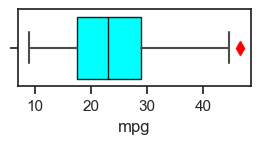

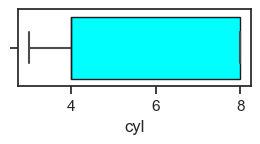

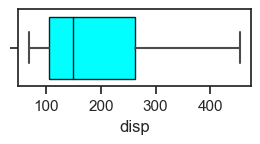

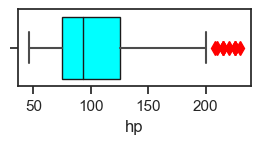

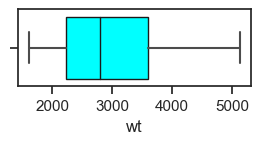

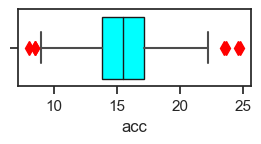

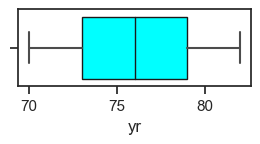

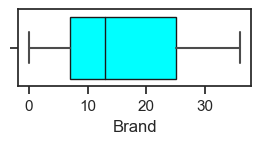

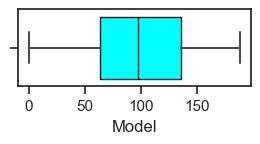

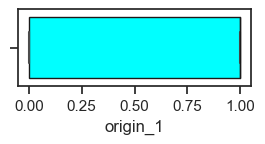

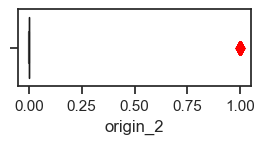

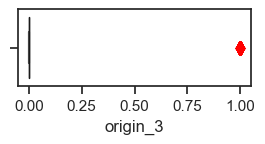

In [25]:
# (auto) 
df = df_no_missing.copy()

scalar_columns = []
for col in df.columns:
    if df[col].dtype!='object': scalar_columns.append( col )

boxprops    = dict( linewidth=1, edgecolor='k', facecolor='cyan' )
medianprops = dict( linewidth=1, color='k' )
flierprops  = dict( marker='d', markersize=7, markerfacecolor='red', markeredgecolor='red' )

for ft in scalar_columns:
    plt.figure(  figsize=(3,1)   )
    BoxPlot( x=df[ ft ] 
           , boxprops    = boxprops
           , medianprops = medianprops
           , flierprops  = flierprops  
           )
    plt.show()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - features: 'mpg', 'hp', 'acc'
   - have outliers and need treatment

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Treating Outliers

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Treating Outliers by Winsorizing

In [26]:
# Winsorizing Extreme Outliers
df_dirty = df_no_missing.copy()    
columns_with_outliers = [ 'mpg', 'hp', 'acc' ]

def winsorize_by_zscore(df,ft):
    x  = df[ft].copy()
    M  = x.mean()
    SD = x.std()
    z  = (x-M) / SD
    
    upper_bound = +3
    lower_bound = -3
    
    ls = df.index[ (z > upper_bound) 
                 | (z < lower_bound) ]
    
    x_Des=sorted(x,reverse=True)
    i=0
    while x_Des[i] >=  M + 3*SD:
        i=i+1 
    MAX=x_Des[i] 
    
    x_Asc=sorted(x,reverse=False)
    i=0 
    while x_Asc[i] <=  M - 3*SD:
        i=i+1  
    MIN=x_Asc[i] 
    
    for i in range(0,len(x)):
        if   z[i] > upper_bound: x[i]=MAX
        elif z[i] < lower_bound: x[i]=MIN
            
    return [x, ls]
 

# df_no_extreme
df_no_extreme = df_dirty.copy()

index_list = []
for c in columns_with_outliers:
    c_clean, ls = winsorize_by_zscore( df_dirty, c )
    index_list.extend( ls )
    df_no_extreme.loc[ :, c ] = c_clean

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Treating Noise (Outliers) by Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest

df_dirty = df_no_extreme.copy()    

X   = df_dirty[ scalar_columns ].values.copy()
AOD = IsolationForest( contamination=0.05 ).fit( X )
flag_clean = AOD.predict( X ) == +1
df_clean   = df_dirty.loc[ flag_clean, : ]
df_clean.index = range(df_clean.shape[0])

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Observing Outliers Before Vs After Treatment

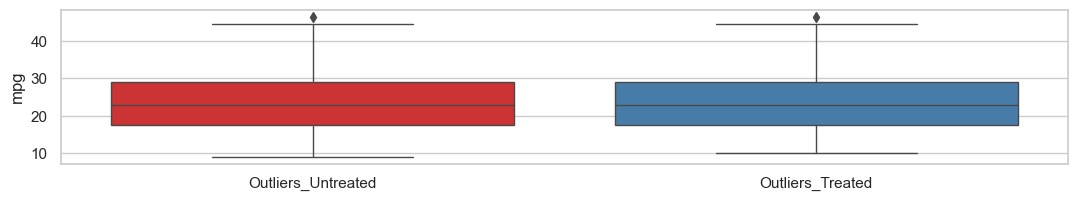

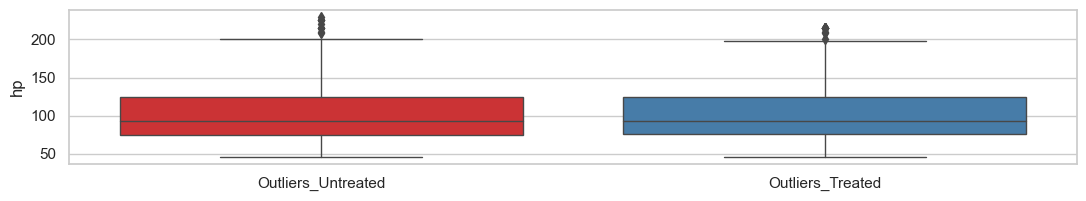

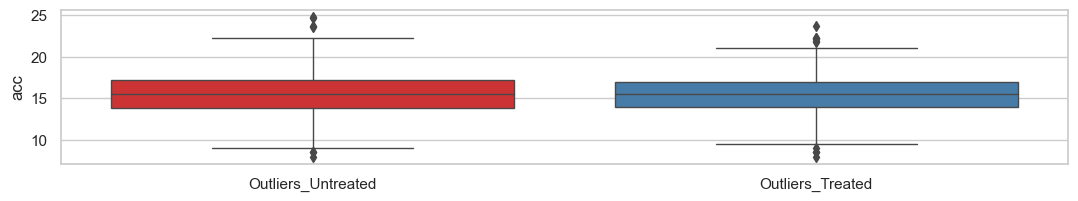

In [28]:
df_before = df_no_missing.copy()
df_before['condition']=['Outliers_Untreated']*df_before.shape[0]
df_after  = df_clean.copy()
df_after['condition'] =['Outliers_Treated']*df_after.shape[0]
df_before_after = pd.concat([df_before,df_after],axis=0)
df_before_after.head()

x   = 'condition'
for y in columns_with_outliers:
    df = df_before_after[ [x,y] ].copy().dropna().sort_values([x],ascending=[False]) 
    # BoxPlot
    sns.set(rc={'figure.figsize':(13,2)}); sns.set(style='whitegrid')
    sns_plot = sns.boxplot( x=x, y=y, data=df, linewidth=1.0, palette='Set1'); sns_plot.set_xlabel('')
    fig = sns_plot.get_figure(); plt.show()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
 - As expected, notable reduction in range and amount of outliers is achieved.

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Observing Clean Variables

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Correlations Heat-Map

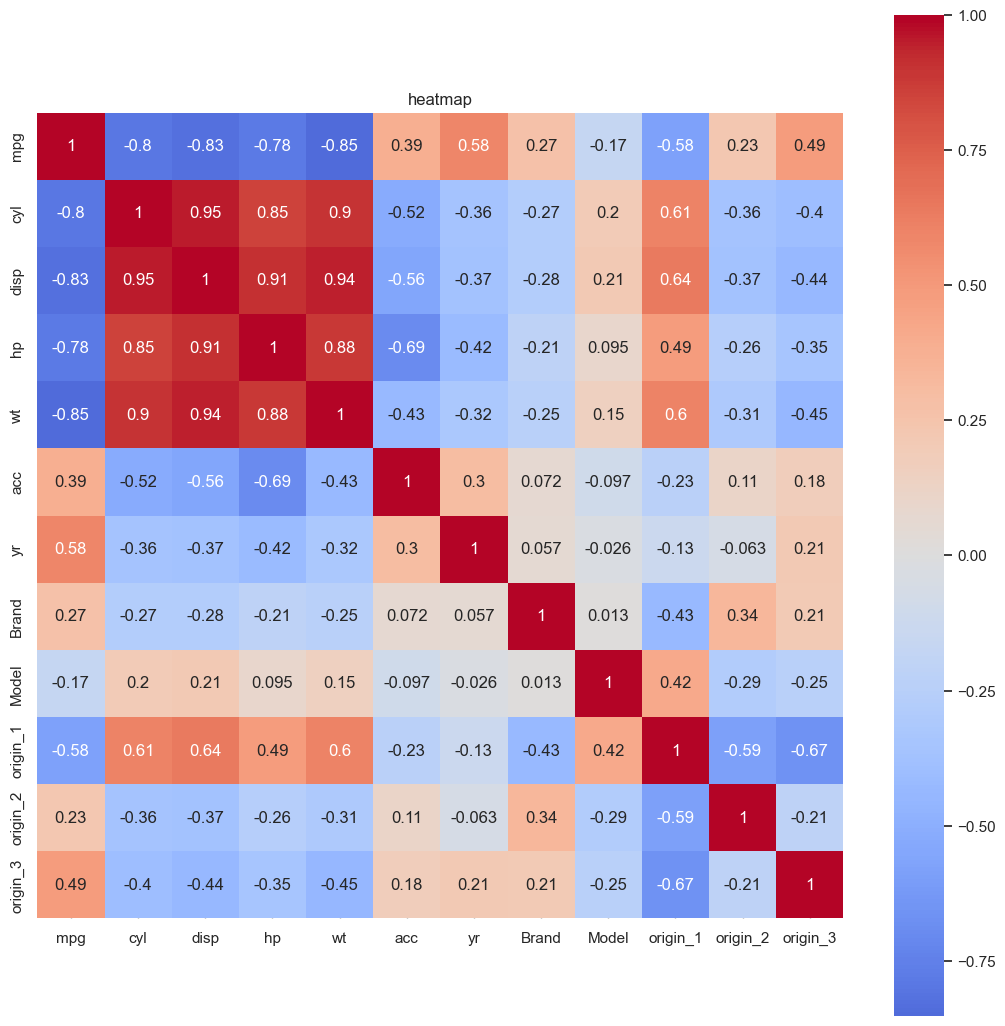

In [29]:
# heatmap
df = df_clean.copy() 

sns.set(style='whitegrid')

corr = df.corr('pearson') # 'pearson', 'kendall', 'spearman'
sorted_cols = corr.index
corr = corr[ sorted_cols ]

fig,ax = plt.subplots(figsize=(13,13))
sns_plot = sns.heatmap( corr, mask=np.zeros_like(corr,dtype=bool), 
                        cmap='coolwarm',
                        square=True, ax=ax, annot=True, center=0.00 )
sns_plot.set( title="heatmap" )
 
fig = sns_plot.get_figure() 
fig.savefig('heatmap.png')

plt.show() 

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> pairplot

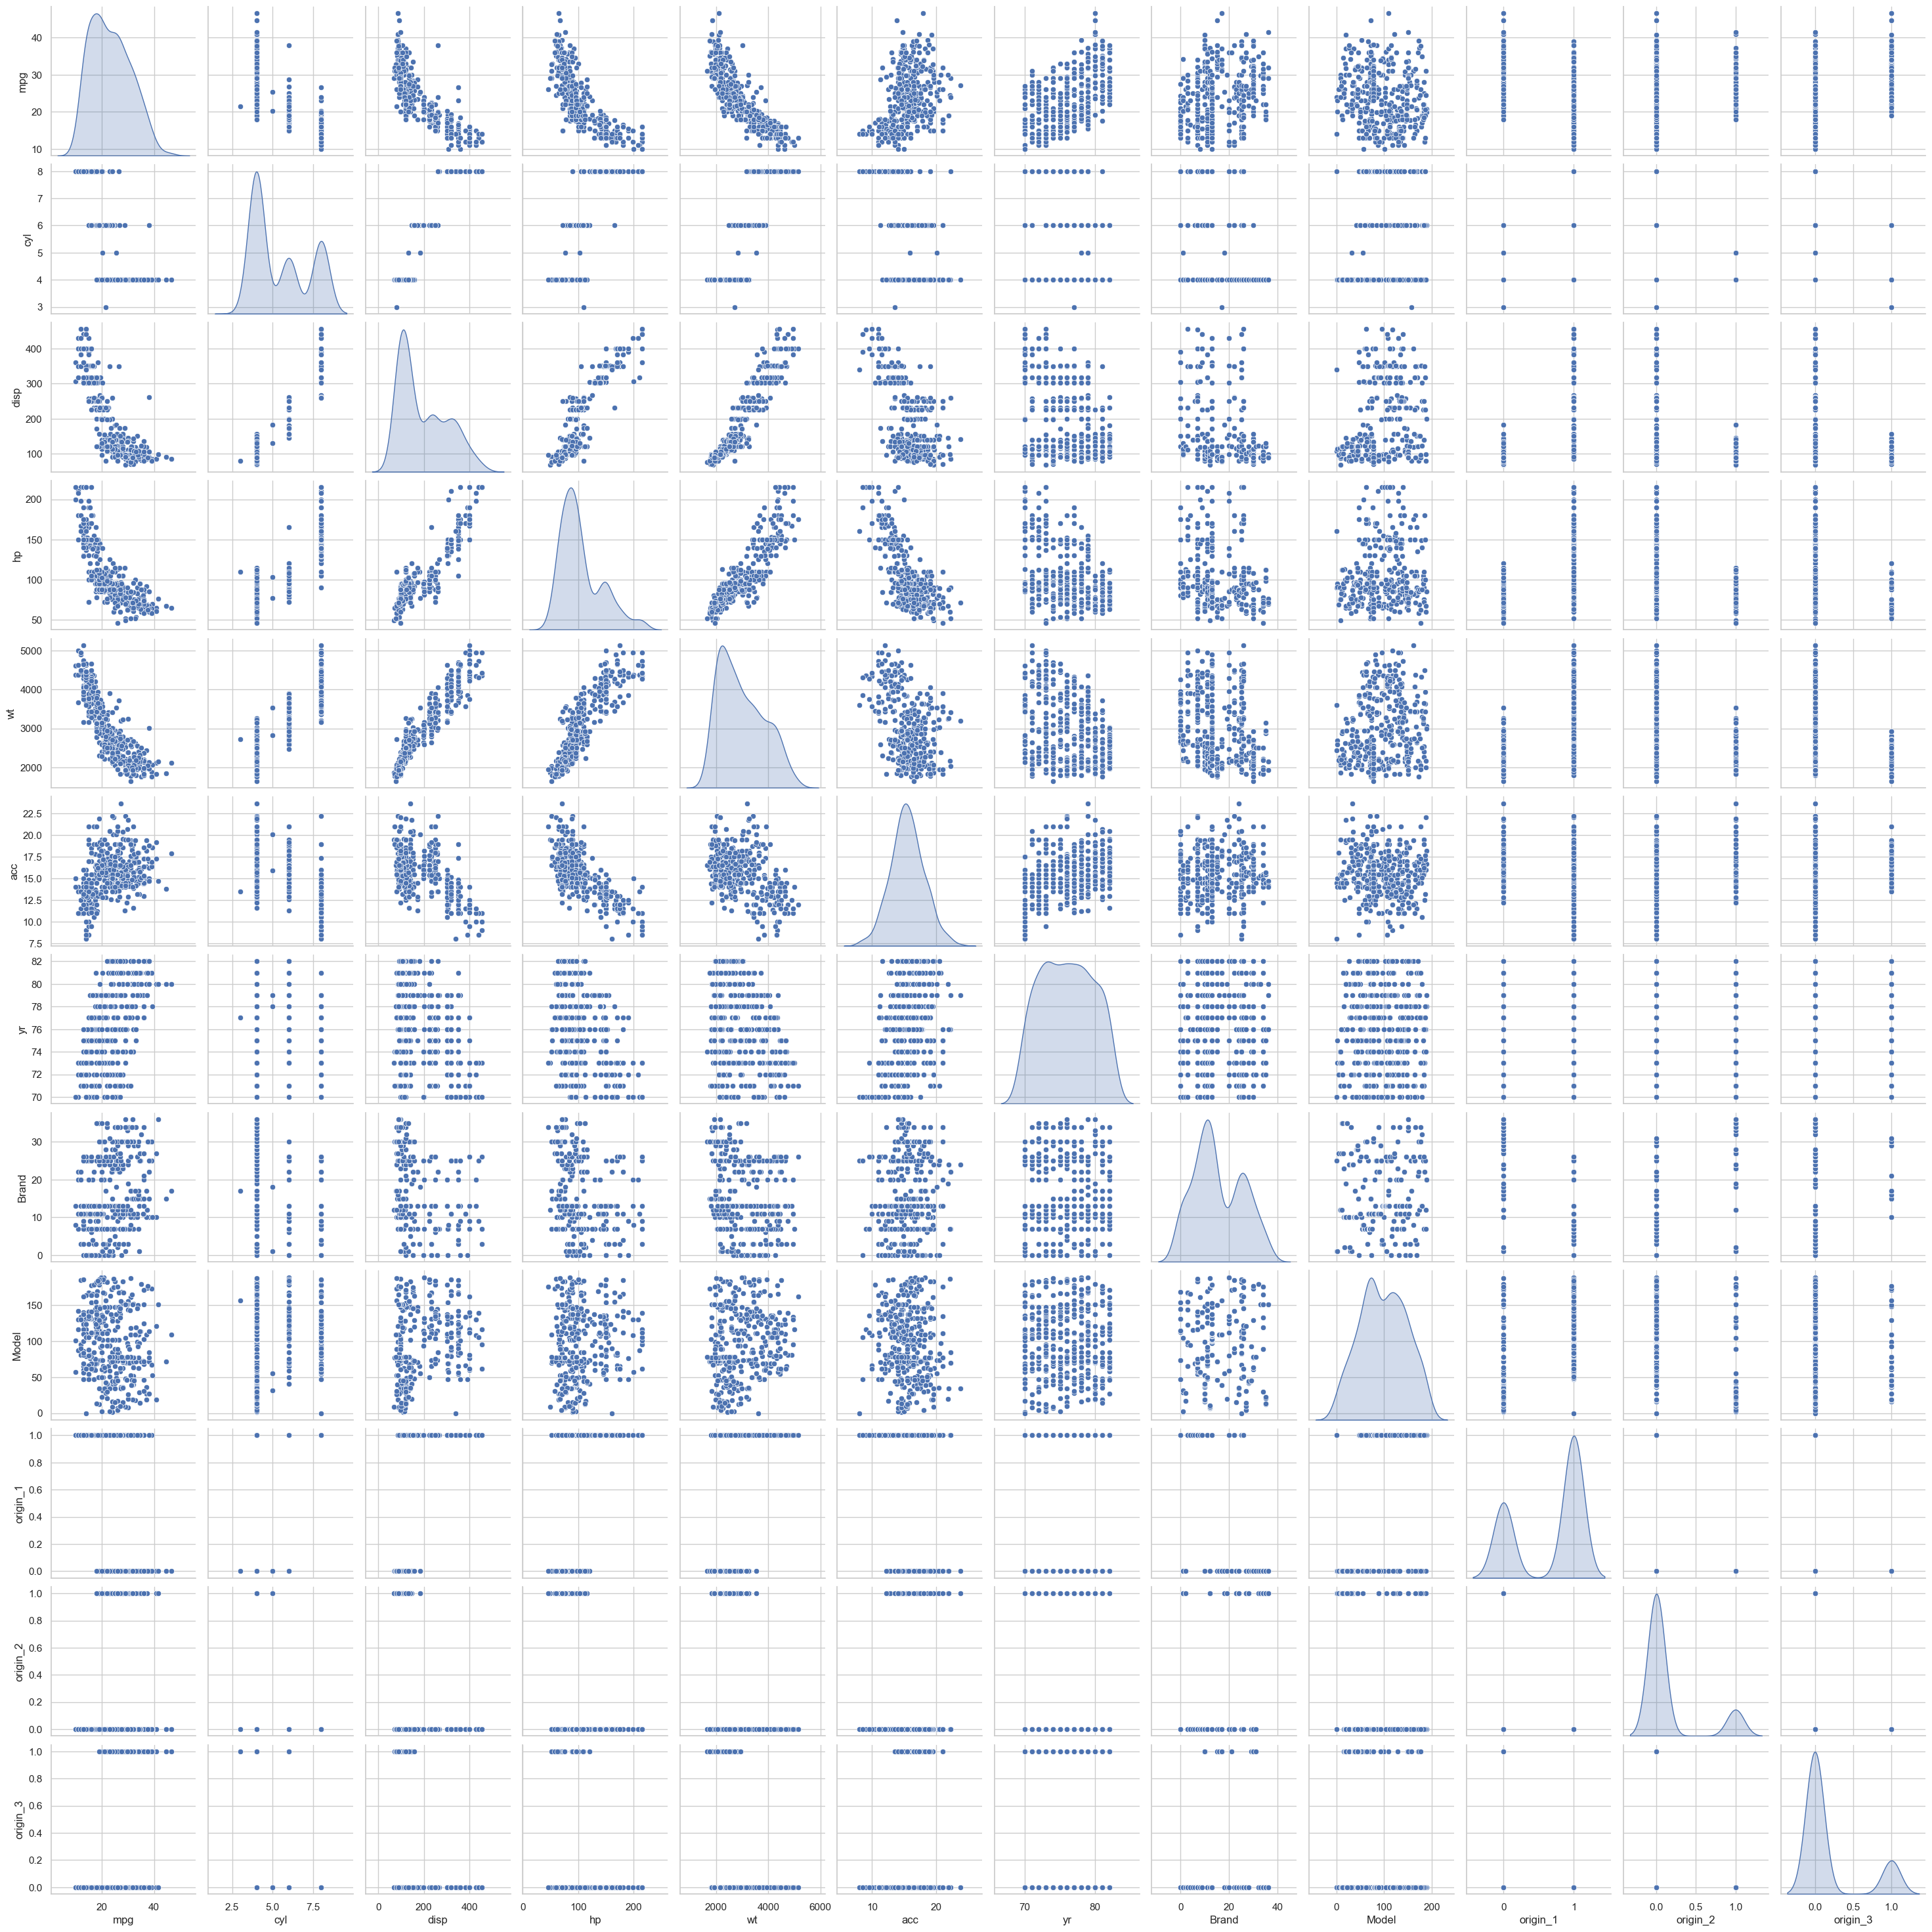

In [30]:
sns.pairplot( df_clean, diag_kind='kde' ); plt.show()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report
    
 - Visually, The Pair-Plot Diagonal reveals that there are at least 3 gaussian distributions (clusters) in the data.

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving Data Sets

In [31]:
from openpyxl       import Workbook
from openpyxl.utils import get_column_letter
from openpyxl       import load_workbook

wb = Workbook()
dest_filename = 'Cluster_DataSet.xlsx'
Empty = wb.active; Empty.title='Empty'     


XX = df_clean.values.copy()    
dfClean = wb.create_sheet('dfClean')
dfClean.append( list(df_clean.columns) )
for i in range( XX.shape[0] ): dfClean.append( list( XX[i,:] )  )

    
# Saving    
wb.save( filename = dest_filename )   

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Data Sets

In [32]:
DataSet  = 'Cluster_DataSet.xlsx'
df_clean =  pd.read_excel( DataSet, 'dfClean'  , header=0 )

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, PowerTransformer, FunctionTransformer

Scaler0 = None
Scaler1 = StandardScaler()    # z-score
Scaler2 = MinMaxScaler()      # 0  1
Scaler3 = MaxAbsScaler()      # 0+ 1
Scaler4 = PowerTransformer()
Scaler5 = FunctionTransformer(np.log1p)
Scaler6 = FunctionTransformer(np.exp)

Scaler  = Scaler1

df = df_clean.copy()
if Scaler!=None:
    df = pd.DataFrame( Scaler.fit_transform(df), columns=df.columns ) 
    
df.sample(10)

mpg       cyl      disp        hp        wt       acc        yr  \
353 -0.572987  0.305463 -0.385142  0.096908 -0.064375  0.008751  0.000723   
11  -0.308758  0.305463  0.027752 -0.385252 -0.396474 -0.183567 -1.638062   
41  -0.361603  0.305463  0.335023  0.016548  0.465569  0.124142  0.546984   
187 -0.639045  0.305463  0.517465 -0.170959  0.636329  1.354977  0.273853   
260  0.061164 -0.866771 -0.433153 -0.519185 -0.152699  0.816487  0.546984   
228  1.369102 -0.866771 -0.855650 -0.787052 -0.912286 -0.414349  1.366376   
180 -1.101447  1.477697  2.236259  2.507705  1.597294 -2.106748 -1.638062   
300 -0.572987  0.305463  0.277410 -0.251319  0.328961  0.201069 -0.272408   
375  2.399599 -0.866771 -0.942070 -0.760265 -0.990011 -0.298958  1.093245   
6   -0.044528 -0.866771 -0.433153 -0.402474  0.059278  1.931932  1.639507   

        Brand     Model  origin_1  origin_2  origin_3  
353  1.471663  0.650010 -1.373134 -0.430062  2.061553  
11  -1.559332  0.314120  0.728261 -0.430062 -0.485071  
41  -1.256233 -0.693551  0.728261 -0.430062 -0.485071  
187 -0.245901  0.272133  0.728261 -0.430062 -0.485071  
260  0.663398  1.552715  0.728261 -0.430062 -0.485071  
228 -0.043835  1.090866 -1.373134 -0.430062  2.061553  
180 -0.245901  0.209154  0.728261 -0.430062 -0.485071  
300  0.966497  1.762646  0.728261 -0.430062 -0.485071  
375  2.077863  1.111859 -1.373134  2.325248 -0.485071  
6   -1.559332 -0.504613  0.728261 -0.430062 -0.485071

In [34]:
# Assigning
df_scaled = df.copy()
np.round( df_scaled.describe().T, 2 )

count  mean  std   min   25%   50%   75%   max
mpg       378.0   0.0  1.0 -1.76 -0.77 -0.08  0.75  3.07
cyl       378.0   0.0  1.0 -1.45 -0.87 -0.87  1.48  1.48
disp      378.0   0.0  1.0 -1.23 -0.87 -0.43  1.02  2.49
hp        378.0  -0.0  1.0 -1.56 -0.76 -0.29  0.55  2.96
wt        378.0   0.0  1.0 -1.57 -0.89 -0.21  0.76  2.54
acc       378.0  -0.0  1.0 -2.88 -0.57  0.01  0.59  3.16
yr        378.0   0.0  1.0 -1.64 -0.82  0.00  0.82  1.64
Brand     378.0   0.0  1.0 -1.56 -0.85 -0.25  0.97  2.08
Model     378.0   0.0  1.0 -2.06 -0.69  0.03  0.79  1.91
origin_1  378.0  -0.0  1.0 -1.37 -1.37  0.73  0.73  0.73
origin_2  378.0   0.0  1.0 -0.43 -0.43 -0.43 -0.43  2.33
origin_3  378.0  -0.0  1.0 -0.49 -0.49 -0.49 -0.49  2.06

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report
    
 - All features have been normalized with mean=0 and std=1

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Finding optimum number of clusters by  Elbow Method
    
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> (Silhouette Score) & (Average Distortion)

n = 1
n = 2
n = 3
n = 4
n = 5
n = 6
n = 7
n = 8
n = 9
n = 10


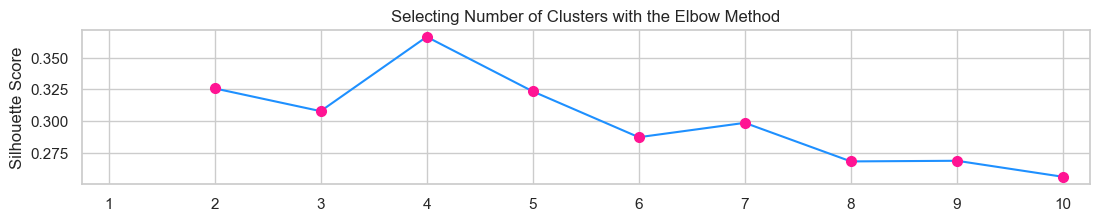

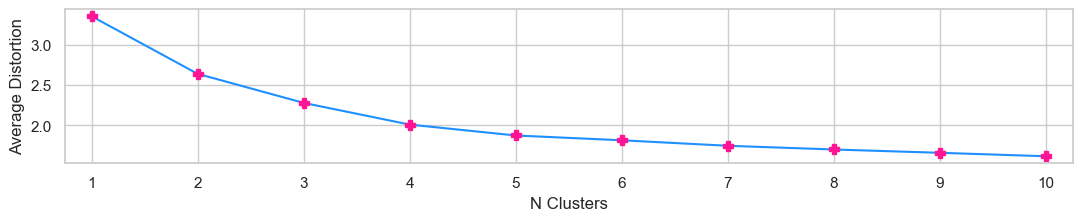

In [35]:
import warnings 
warnings.filterwarnings('ignore')

n_range = np.arange(1,11)

SILHOUETTE_SCORE, meanDistortions = [],[]
for n in n_range:
    print('n =',n) 
    
    mbkmean = MiniBatchKMeans(
          n_clusters         =  n             #  int, default=8
        , n_init             =  500           # 'warn', 'auto' or int, default=10
        , init               = 'k-means++'    # 'k-means++', 'random'
        , tol                =  0.00001       #  float, default=1e-4
        , max_iter           =  10000         #   int,  default=300
        , verbose            =  0
        , random_state       =  RANDOM_STATE
        # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
        , compute_labels     =  True                         
        , init_size          =  None
        , batch_size         =  1024
        , max_no_improvement =  10
        , reassignment_ratio =  0.01
        )

    # fitting the clusterer
    clsr = mbkmean.fit( df_scaled )
    
    # silhouette score
    if n>1:
        clsr_ss = silhouette_score( df_scaled, clsr.labels_ )  # the smaller the better 
        SILHOUETTE_SCORE.append( clsr_ss )
        
    # mean distortions
    meanDistortions.append(sum(np.min(cdist( df_scaled, clsr.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])


# Plotting Silhouette Scores
plt.plot( n_range[1:], SILHOUETTE_SCORE, color='dodgerblue', marker='o', mec='deeppink', mfc='deeppink', markersize=7 ) 
plt.xticks(n_range)
plt.ylabel('Silhouette Score')
plt.xlim(0.75,10.25)
plt.title('Selecting Number of Clusters with the Elbow Method')
plt.show()   
    
# Plotting Mean Distortions
plt.plot( n_range, meanDistortions, color='dodgerblue', marker='P', mec='deeppink', mfc='deeppink', markersize=7 ) 
plt.xlabel('N Clusters')
plt.xticks(n_range)
plt.ylabel('Average Distortion')
plt.xlim(0.75,10.25)
plt.show()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report
    
 - **Elbow Method** with **Silhouette Score** reveals that optimum number of clusters is Either **2** or **3**
 - **Elbow Method** with **Average Distortion** shows that optimum number of clusters is **4**

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Assigning

In [36]:
N_CLUSTERS = 4

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Making (MiniBatch)kmeans Clusterer

In [37]:
mbkmean = MiniBatchKMeans( 
          n_clusters         =  N_CLUSTERS    #  int, default=8
        , n_init             =  500           # 'warn', 'auto' or int, default=10
        , init               = 'k-means++'    # 'k-means++', 'random'
        , tol                =  0.00001       #  float, default=1e-4
        , max_iter           =  10000         #   int,  default=300
        , verbose            =  0
        , random_state       =  RANDOM_STATE
        # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
        , compute_labels     =  True                         
        , init_size          =  None
        , batch_size         =  1024
        , max_no_improvement =  10
        , reassignment_ratio =  0.01
        )
clsr = mbkmean.fit( df_scaled ) 

#clsr_centroids = clsr.cluster_centers_    
#clsr_ss        = silhouette_score( x_scaled, clsr.labels_ )  # the smaller the better
#y_predict      = clsr.predict( x_scaled )    # new x
#y_distances    = clsr.transform( x_scaled )  # new x 

In [38]:
#  number of data in each cluster
labels = clsr.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 59  98 149  72]


In [39]:
# centers in each cluster
centroids   = clsr.cluster_centers_
centroid_df = pd.DataFrame( centroids, columns = list(df_clean.columns) )
centroid_df.transpose()

0         1         2         3
mpg       0.548873 -1.140305  0.044644  0.993369
cyl      -0.844263  1.461005 -0.221364 -0.825686
disp     -0.854493  1.442536 -0.163690 -0.899049
hp       -0.607664  1.481963 -0.368200 -0.713944
wt       -0.715917  1.362538 -0.159449 -0.916041
acc       0.268691 -1.079962  0.407486  0.377829
yr       -0.137521 -0.596602  0.244726  0.438434
Brand     0.821699 -0.345727 -0.311594  0.432224
Model    -0.631716  0.213223  0.377566 -0.544223
origin_1 -1.373134  0.728261  0.728261 -1.373134
origin_2  2.325248 -0.430062 -0.430062 -0.430062
origin_3 -0.485071 -0.485071 -0.485071  2.061553

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> PCA of Clusters

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Initiating PCA

In [40]:
from sklearn.decomposition import PCA
pca = PCA( )
x_pca = pca.fit_transform( df_scaled )
x_pca_scaled = scale( 
    np.column_stack(( 
          x_pca[:,0]
        , x_pca[:,1] 
        )))

# pc1 pc2
x_pc1_scaled = x_pca_scaled[:,0] 
x_pc2_scaled = x_pca_scaled[:,1] 

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> PCA Scree Plot

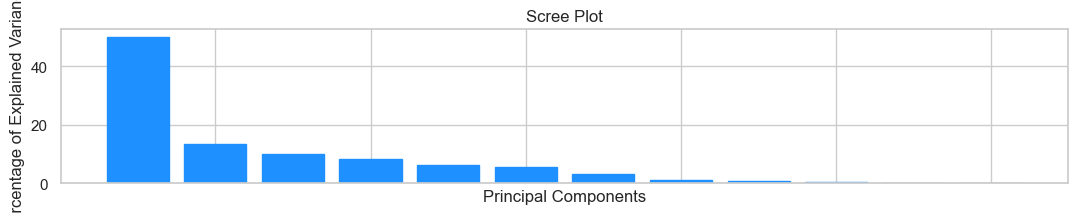

In [41]:
# Scree Plot
per_var = np.round( pca.explained_variance_ratio_ * 100, decimals=1 )
labels  = [ str(x) for x in range(1, len(per_var)+1) ]
   
plt.bar( 
          x         = range( 1, len(per_var)+1 )
        , height    = per_var
        , color     = 'dodgerblue'
        , edgecolor = 'dodgerblue'
        )
  
plt.tick_params( 
    axis='x',
    which='both',
    bottom=False,    
    top=False,
    labelbottom=False )
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.savefig('Scree_Plot.png', dpi=120) 
plt.show()

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> PCA of Clusters Centroids

In [42]:
# Clusters Centroids
clsr_centroids = clsr.cluster_centers_

L = []
for i in range( clsr_centroids.shape[0] ):   L.append( list(  clsr_centroids[i]) )
for i in range(      df_scaled.shape[0] ):   L.append( list(df_scaled.values[i]) )

pca = PCA( )
L_pca = pca.fit_transform( L )
L_pca_scaled = scale( 
    np.column_stack(( 
          L_pca[:,0]
        , L_pca[:,1] 
        )))
# pc1 pc2
L_pc1_scaled = L_pca_scaled[:,0] 
L_pc2_scaled = L_pca_scaled[:,1] 

Centers_1 = L_pc1_scaled[ range(N_CLUSTERS) ]
Centers_2 = L_pc2_scaled[ range(N_CLUSTERS) ]
 

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> PCA Scatter Plot

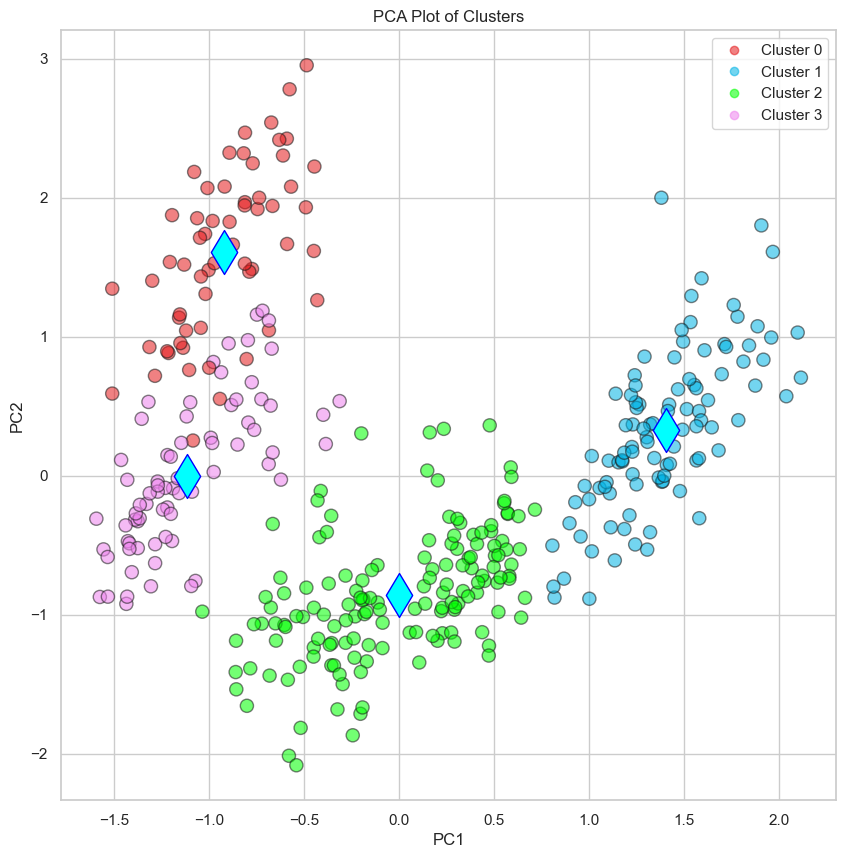

In [43]:
from matplotlib import colors

# Labels
y_predict = clsr.predict( df_scaled )

# Plot 
fig, ax = plt.subplots(figsize=(10,10)) # figsize=(10,10)  
 
# Labels
scatter1 = ax.scatter( 
      x_pc1_scaled
    , x_pc2_scaled  
    , cmap = colors.ListedColormap(['#e41a1c','#00b3e5','lime','violet'])    #  '#4daf4a'  cmap='rainbow_r'    
    , c    = y_predict
    , s    = 90
    , edgecolors = 'k'
    , alpha      = 0.55 
    )

# Centeroids
scatter2 = ax.scatter( 
      Centers_1
    , Centers_2
    , marker = 'd'
    , c      = 'cyan'
    , s      = 500
    , edgecolors = 'blue'
    , alpha      = 1.00 
    ) 

# Legend
legend = ax.legend( scatter1.legend_elements()[0],
                    scatter1.legend_elements()[1], 
                    loc='best')
legend.get_texts()[0].set_text('Cluster 0')
legend.get_texts()[1].set_text('Cluster 1')
legend.get_texts()[2].set_text('Cluster 2')
legend.get_texts()[3].set_text('Cluster 3')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Plot of Clusters')

plt.savefig( 'pca1_pca2.png', dpi=180 )
plt.show()

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Extracting Data From Clusters

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> DataFrame of Clusters

In [44]:
df_clusters            = df_clean.copy()
df_clusters['cluster'] = y_predict

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing Clusters by Box-Plot

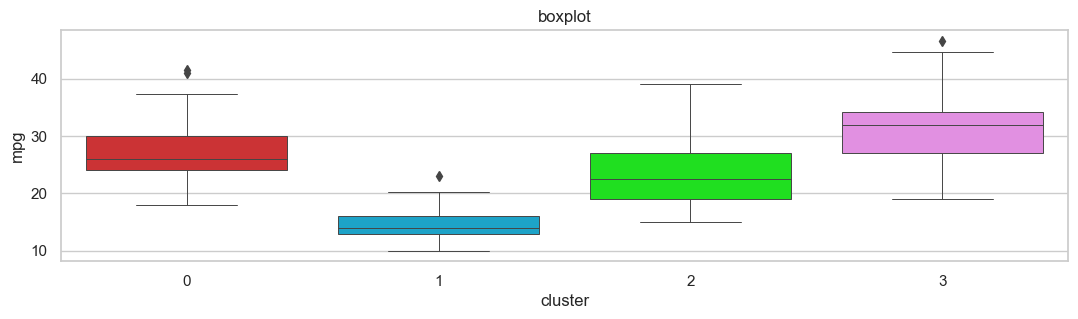

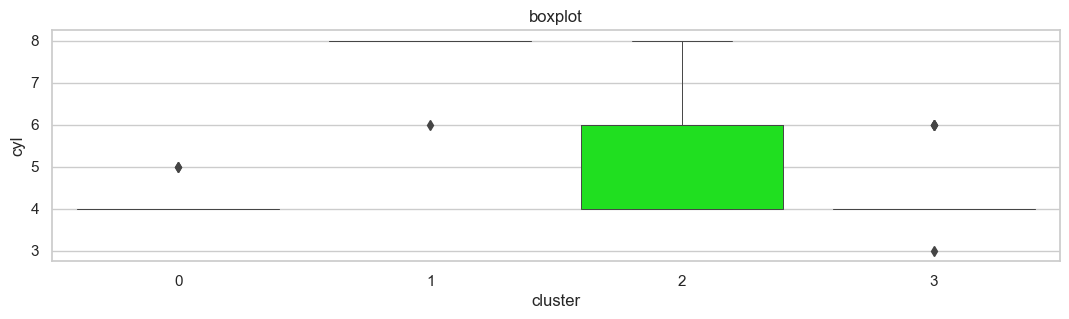

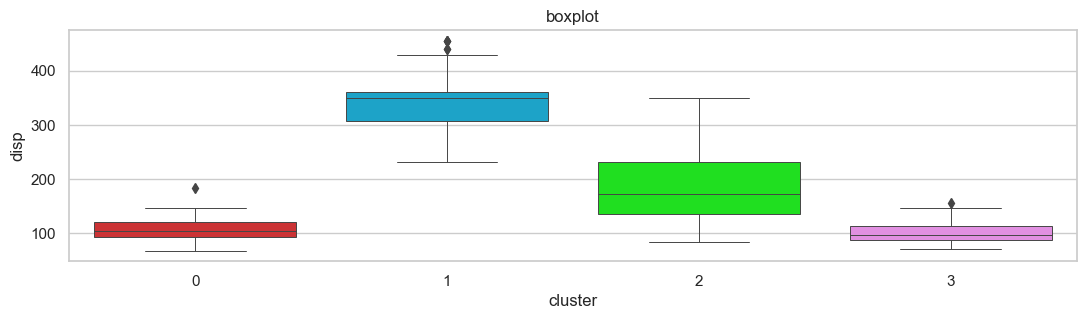

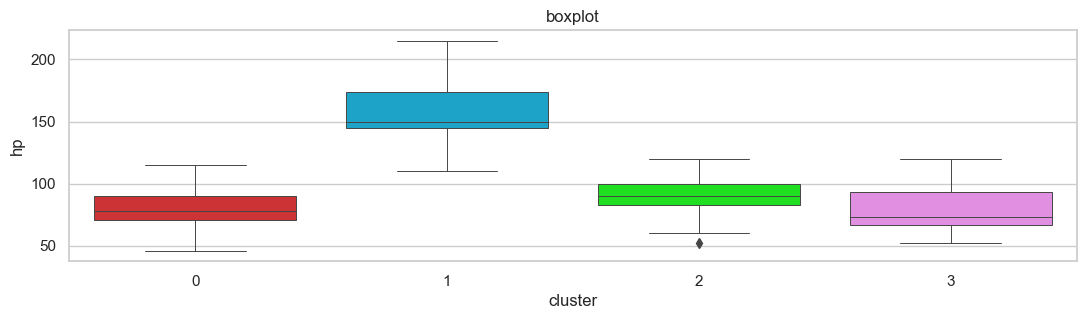

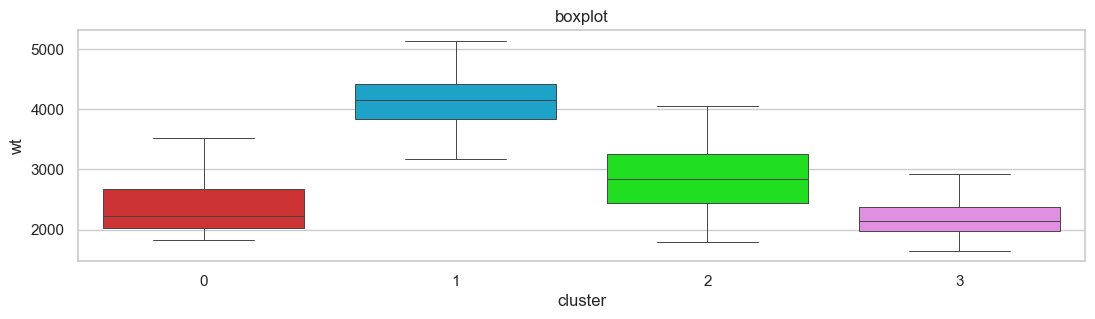

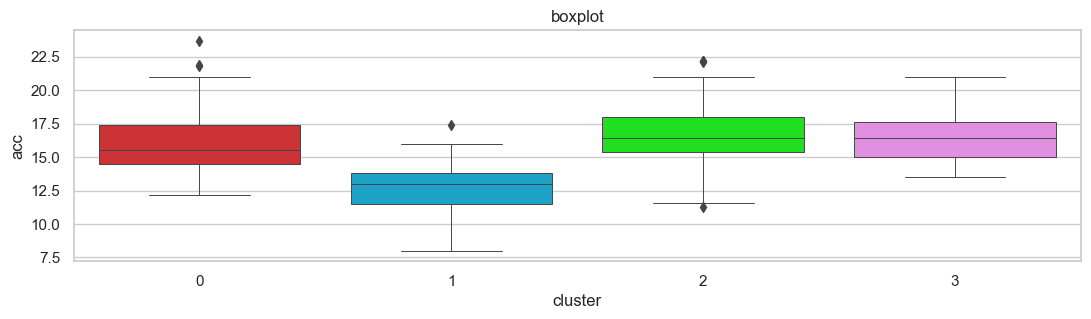

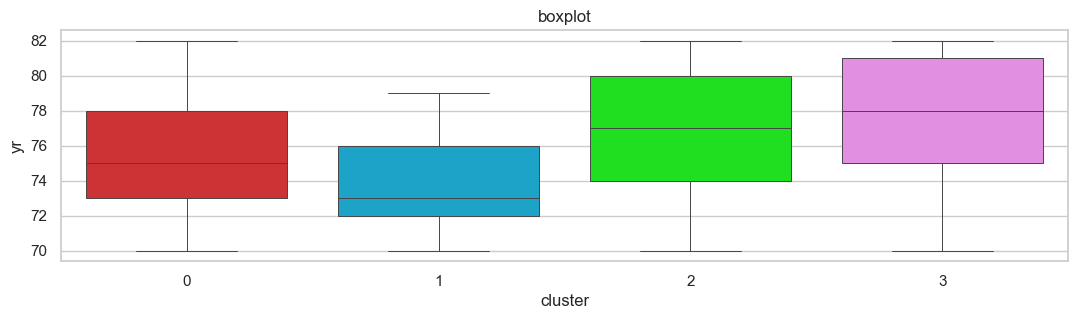

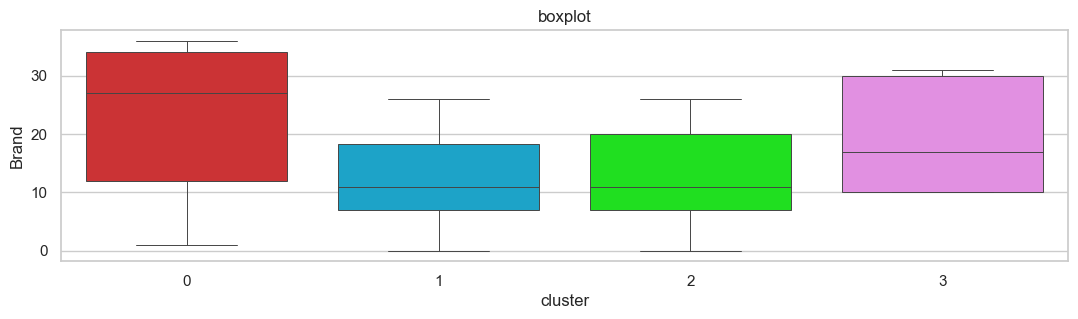

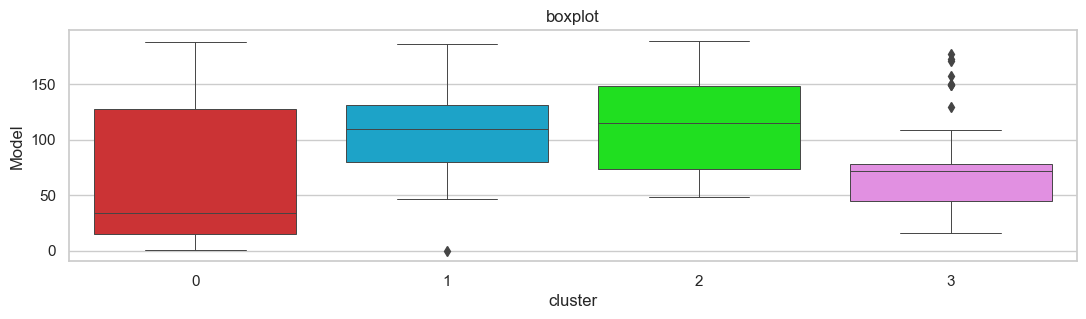

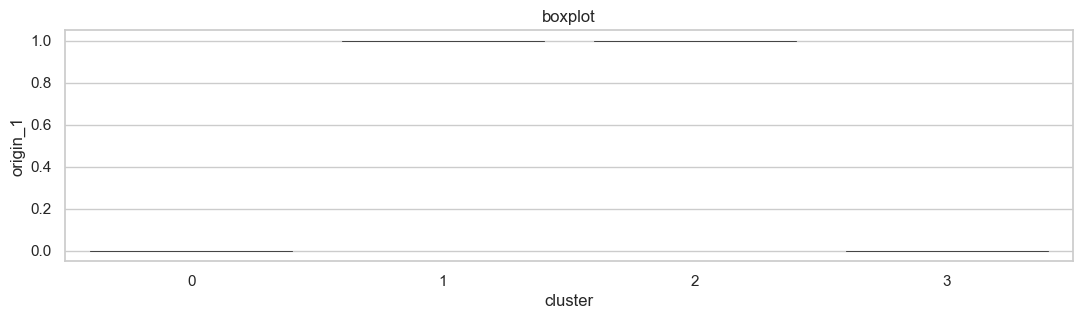

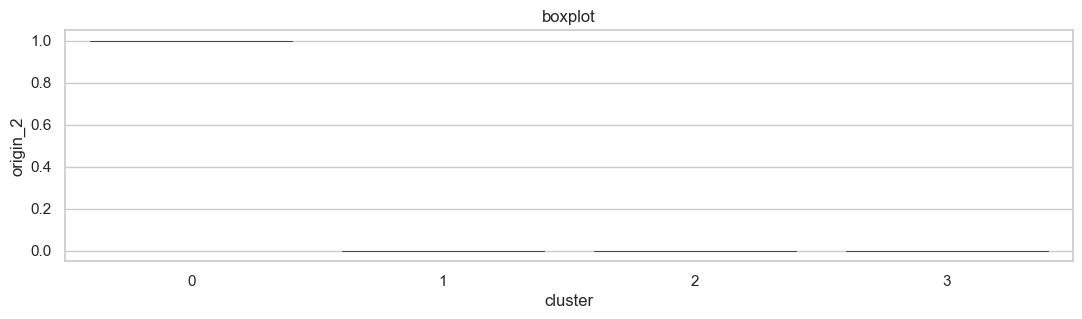

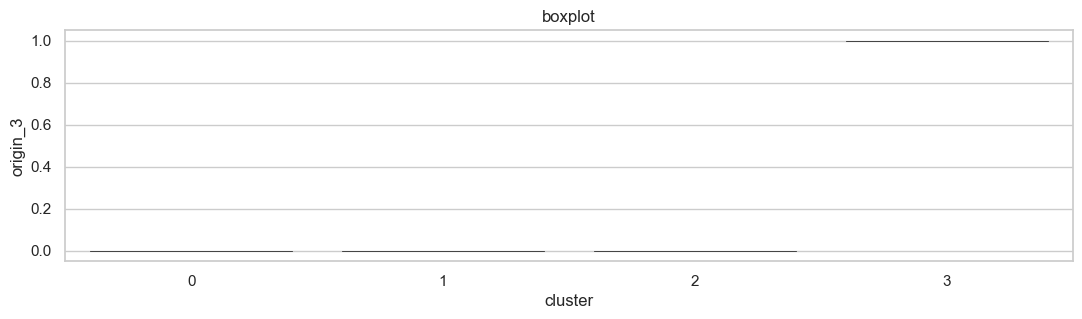

In [45]:
sns.set(rc={'figure.figsize':(13,3)})
sns.set(style='whitegrid')

for ft in df_clean.columns: 
    sns_plot = sns.boxplot( x='cluster', y=ft, data=df_clusters, #hue='cluster',
                        #order=['frontal', 'parietal'],  # order of x 
                        linewidth=.7, 
                        palette=['#e41a1c','#00b3e5','lime','violet']    #  '#4daf4a'  
                          )  # Set1  Set2  Set3  rocket  vlag  blues_d  rainbow_r
    sns_plot.set( title="boxplot" )

    fig = sns_plot.get_figure() 
    #fig.savefig('boxplot.png')
 
    plt.show() 

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report: 
    
 - group 0 is typically **old** cars found in **origin 2** with very low **'disp'**
 - group 3 is typically **new** cars found in **origin 3** with very low **'disp'**, very high **'mpg'** and very new
    
 - group 1 and 2 are typically cars found in **origin 1** 
 - group 1 is typically **older** cars with vey high **'disp'**, very low **'mpg'**, very high **'hp'** and very low **'acc'**
 - group 2 is typically **newer** cars with avrage **'disp'**
    
** **
 it seems the data is the most separated via **'disp'**, **'mpg'**, **'yr'** and **'origin'**
* **

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Comparing Clusters by Pair-Plot

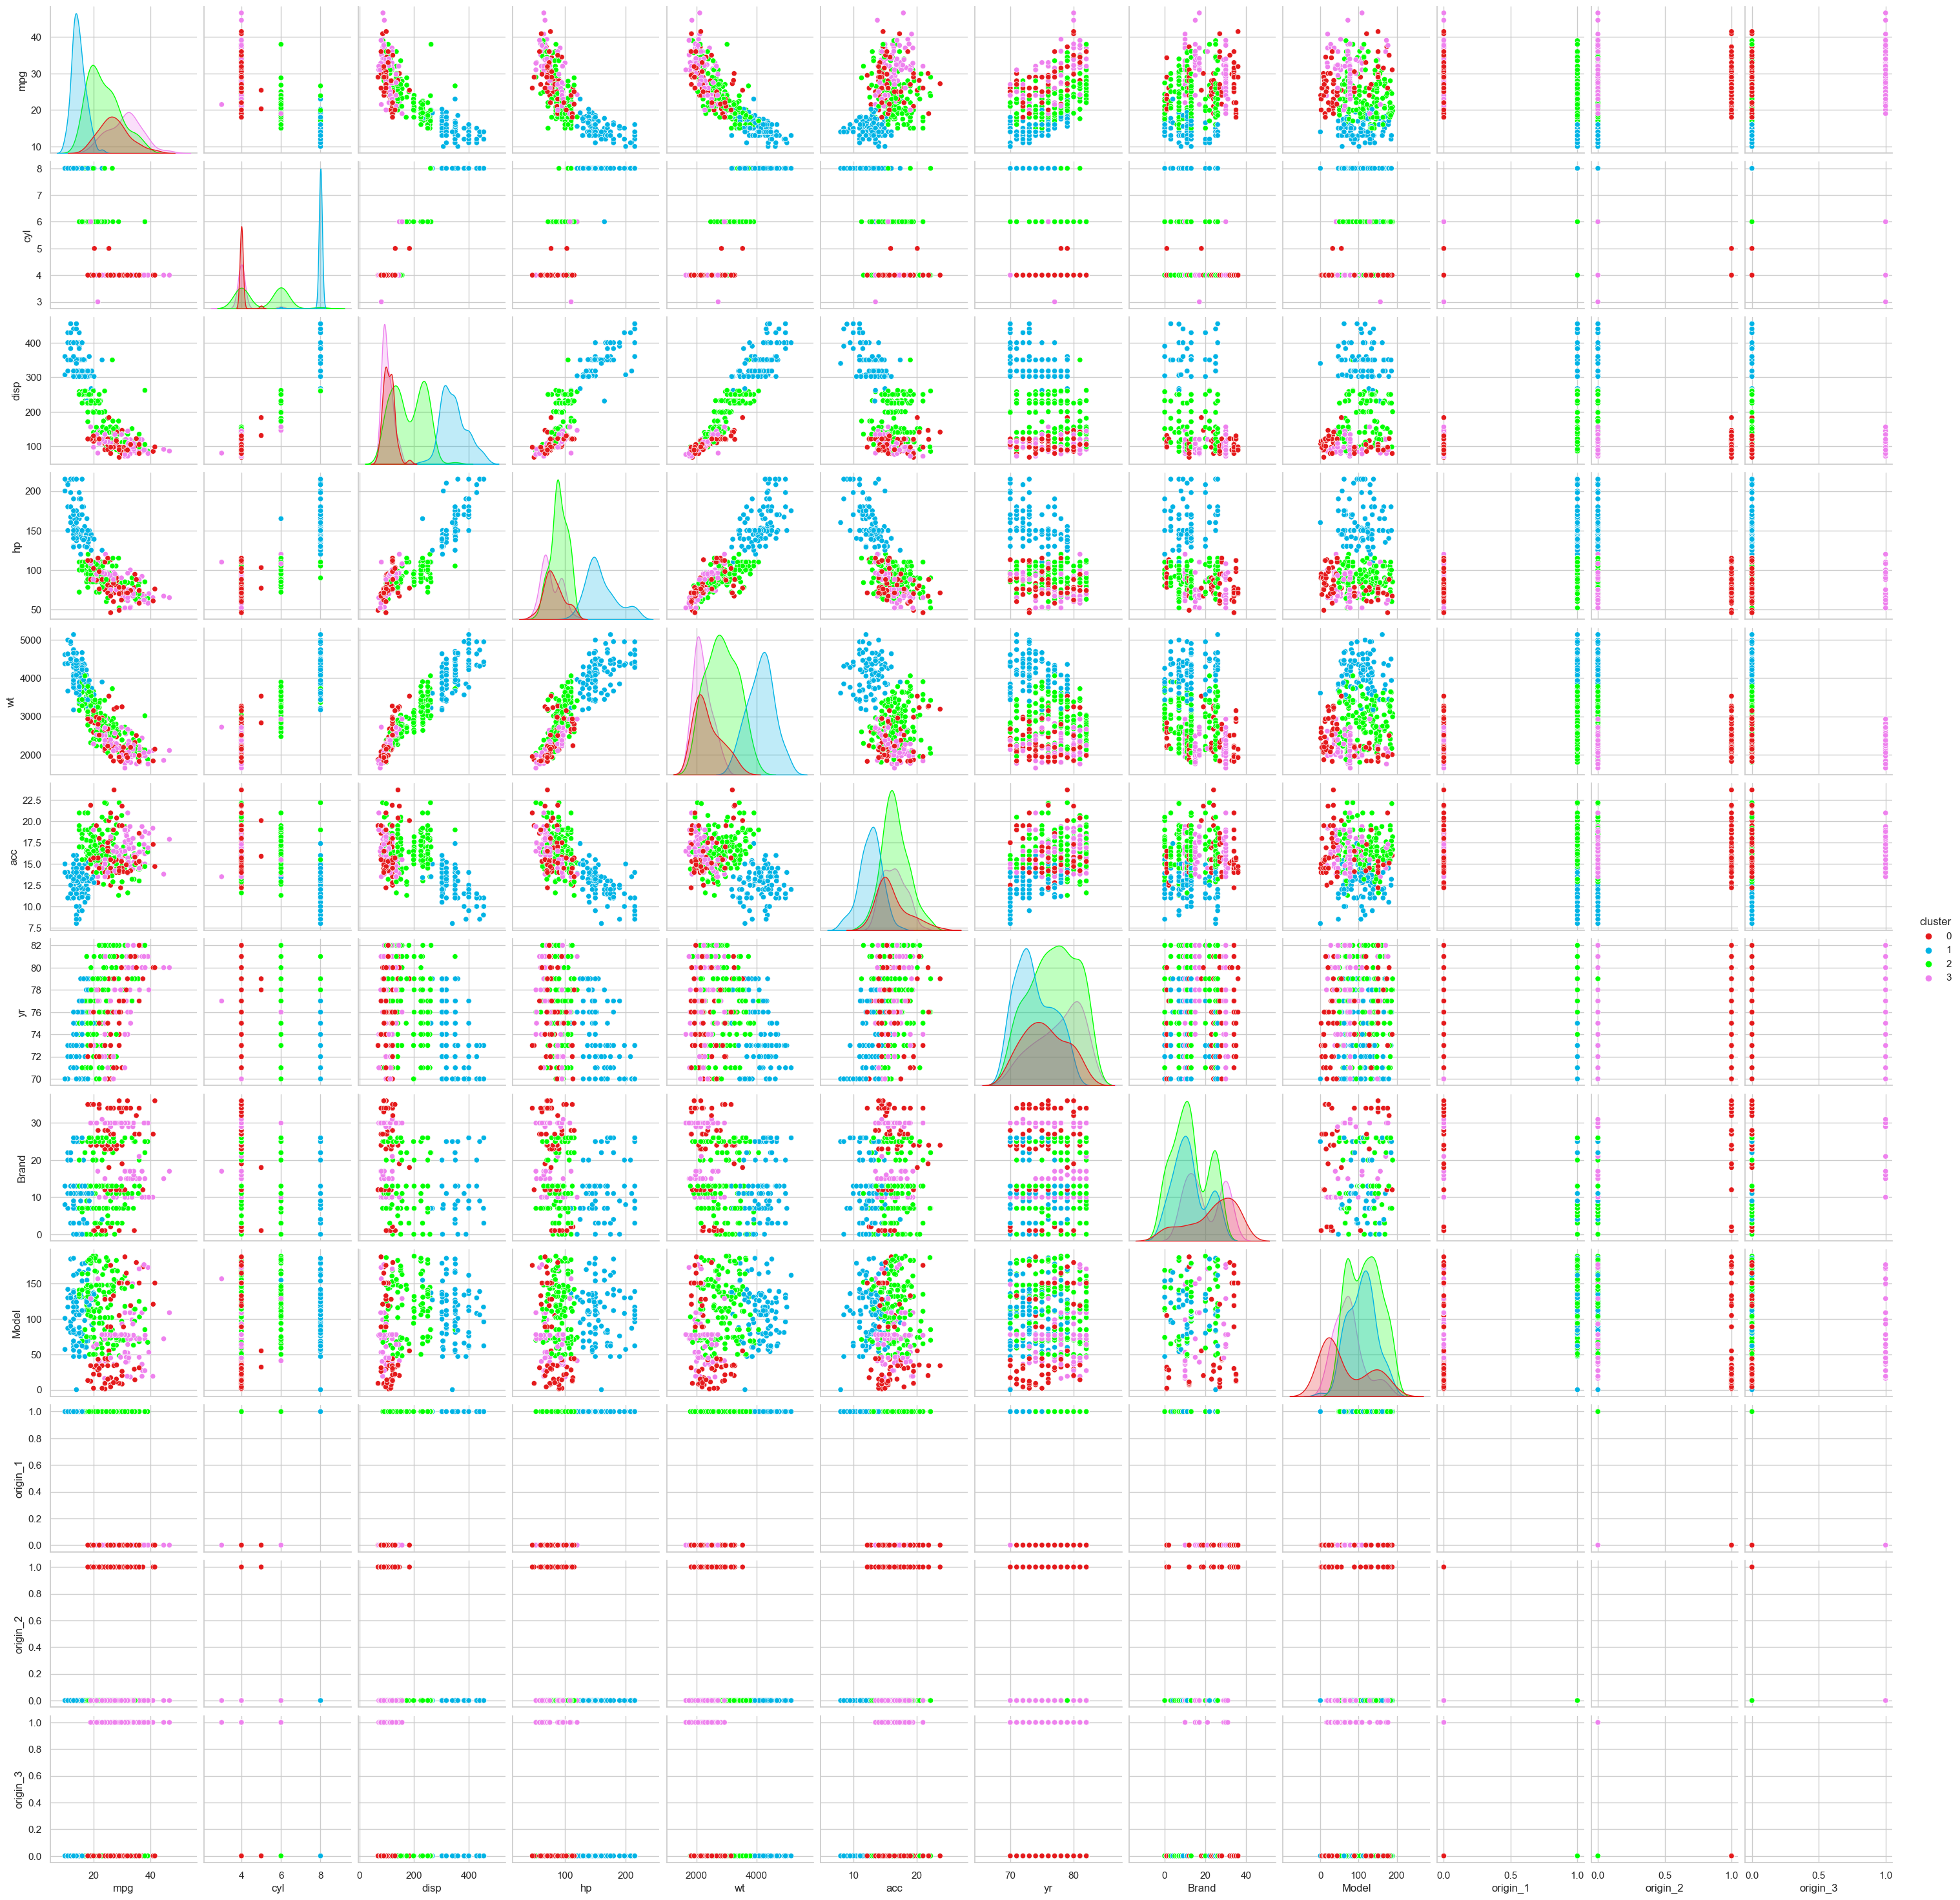

In [46]:
sns.pairplot( df_clusters, hue='cluster', diag_kind='kde',
              palette=['#e41a1c','#00b3e5','lime','violet'],
            ); plt.show()

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:deeppink;"> Report
    
 - Data Visualization Reveals that there is a significant difference between the clusters.

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Saving Estimators To Disk

In [47]:
ESTIMATORS       = [      clsr       ]
ESTIMATORS_Names = [ 'mbkmeans_clsr' ]

for i in range( len(ESTIMATORS) ):
    Estimator        = ESTIMATORS[ i ]
    Destination_File = ESTIMATORS_Names[ i ]+'.sav'
    pickle.dump( Estimator, open(Destination_File,'wb') )

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Loading Estimators From Disk

In [48]:
clsr  =  pickle.load( open( 'mbkmeans_clsr.sav'  ,'rb') )

** **

#####   
<span style="font-family:Arial; font-weight:Bold; font-size:1.8em; color:#00b3e5;"> Making The Final Estimator

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Checkig Range of Features

In [49]:
round( df_clean.describe().T[['min','max']], 3 )

min     max
mpg         10.0    46.6
cyl          3.0     8.0
disp        68.0   455.0
hp          46.0   215.0
wt        1649.0  5140.0
acc          8.0    23.7
yr          70.0    82.0
Brand        0.0    36.0
Model        0.0   189.0
origin_1     0.0     1.0
origin_2     0.0     1.0
origin_3     0.0     1.0

In [50]:
df_clean.iloc[0,:]

mpg           13.0
cyl            8.0
disp         360.0
hp           175.0
wt          3821.0
acc           11.0
yr            73.0
Brand          0.0
Model         47.0
origin_1       1.0
origin_2       0.0
origin_3       0.0
Name: 0, dtype: float64

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Entering A New Item

In [51]:
# input data                R  a  n  g  e  

mpg      =   13.0       #   10.0     46.6
cyl      =    8.0       #    3.0      8.0
disp     =  360.0       #   68.0    455.0
hp       =  175.0       #   46.0    215.0
wt       = 3821.0       # 1649.0   5140.0
acc      =   11.0       #    8.0     23.7
yr       =   73.0       #   70.0     82.0
Brand    =    0.0       #    0.0     36.0
Model    =   47.0       #    0.0    189.0
origin_1 =    1.0       #    0.0      1.0
origin_2 =    0.0       #    0.0      1.0
origin_3 =    0.0       #    0.0      1.0

<span style="font-family:Arial; font-weight:Bold; font-size:1.5em; color:#00b3e5;"> Predicting 

In [52]:
# helper
df_clean.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'Brand', 'Model',
       'origin_1', 'origin_2', 'origin_3'],
      dtype='object')

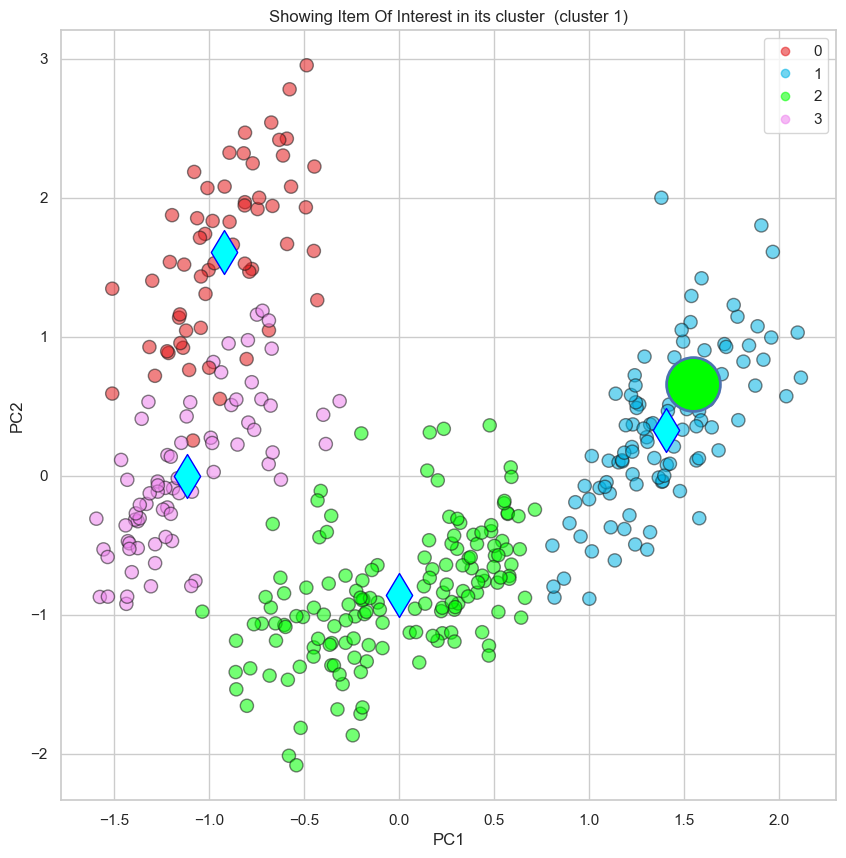

In [53]:
# x 
x = df_clean.copy()

# s  written in the same order as  x
s = [ mpg, cyl, disp, hp, wt, acc, yr, Brand, Model, origin_1, origin_2, origin_3 ]

encode_columns = [] 
def predicted_class( s, x, encode_columns ):
    s  = pd.DataFrame( [s.copy(),s.copy()], columns=x.columns )
    sx = pd.concat( [s,x], axis=0 )
    sx_encoded = pd.get_dummies(
          sx
        , columns = encode_columns
        )
    #print(sx_encoded.columns)
    sx_scaled = scale(  sx_encoded.iloc[1:,:]  )  
    
    pca   = PCA( )
    sx_pca = pca.fit_transform( sx_scaled )
    sx_pca_scaled = scale( 
    np.column_stack(( 
          sx_pca[:,0]
        , sx_pca[:,1] 
        )))
    # pc1 pc2
    sx_pc1_scaled = sx_pca_scaled[:,0] 
    sx_pc2_scaled = sx_pca_scaled[:,1] 
    
    s1 = sx_pc1_scaled[ 0 ]
    s2 = sx_pc2_scaled[ 0 ]
    
    sx_scaled = sx_scaled[[0,1]]      
    pred = clsr.predict( sx_scaled )[0]  
    
    return pred, s1,s2 


# Predicting
pred, s1, s2 = predicted_class( s, x, encode_columns )
    
# PCA Scatter Plot 
fig, ax = plt.subplots(figsize=(10,10)) # figsize=(10,10)  
#cmap = colors.ListedColormap(['#e41a1c','#4daf4a']) 

scatter1 = ax.scatter( 
      x_pc1_scaled
    , x_pc2_scaled
    , cmap = colors.ListedColormap(['#e41a1c','#00b3e5','lime','violet'] )    #  '#4daf4a'  cmap='rainbow_r'  
    , c    = y_predict
    , s    = 90
    , edgecolors = 'k'
    , alpha      = 0.55 
    )

scatter2 = ax.scatter( 
      Centers_1
    , Centers_2
    , marker = 'd'
    , c      = 'cyan'
    , s      = 500
    , edgecolors = 'blue'
    , alpha      = 1.00 
    )

scatter3 = ax.scatter( 
      s1
    , s2
    , marker = 'o'
    , c      = 'lime'
    , s      = 1500
    , edgecolors = 'b'
    , linewidths =  2
    , alpha      =  1.00 
    ) 

legend = ax.legend( scatter1.legend_elements()[0],
                    scatter1.legend_elements()[1], 
                    loc='best')
    
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Showing Item Of Interest in its cluster  (cluster '+str(pred)+')') 

plt.savefig('pca1_pca2.png', dpi=180 )
plt.show()

#####   

#####   